# Classification with Python

In [5]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [9]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2022-10-14 09:51:20--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2022-10-14 09:51:20 (122 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [10]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [11]:
df.shape

(346, 10)

In [12]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male
...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,male
342,395,395,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,male
343,397,397,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,male
344,398,398,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,male


In [13]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [14]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.9

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.07.19 |       h06a4308_0         131 KB  anaconda
    certifi-2022.6.15          |   py39h06a4308_0         156 KB  anaconda
    openssl-1.1.1q             |       h7f8727e_0         3.8 MB  anaconda
    seaborn-0.11.2             |     pyhd3eb1b0_0         223 KB  anaconda
    ------------------------------------------------------------
                                           Total:         4.3 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates                                 pkgs/main --> anaconda
  certifi                                         pkgs/main --> anaconda
  openssl                                         pkgs/main --> an

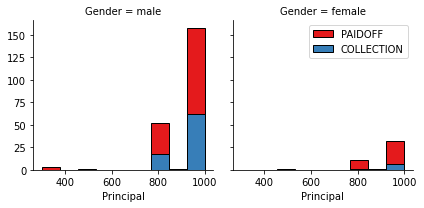

In [15]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

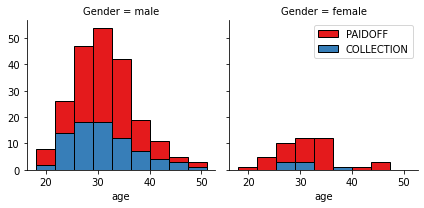

In [16]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

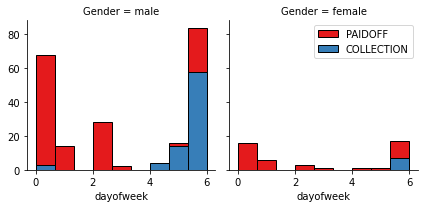

In [17]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [18]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,male,6,1
342,395,395,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,male,6,1
343,397,397,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,male,0,0
344,398,398,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,male,0,0


In [19]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [20]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [21]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [22]:
df[['Principal','terms','age','Gender','education']]

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college
...,...,...,...,...,...
341,800,15,32,0,High School or Below
342,1000,30,25,0,High School or Below
343,800,15,39,0,college
344,1000,30,28,0,college


In [23]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [24]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [25]:
y = df['loan_status']
y

0         PAIDOFF
1         PAIDOFF
2         PAIDOFF
3         PAIDOFF
4         PAIDOFF
          ...    
341    COLLECTION
342    COLLECTION
343    COLLECTION
344    COLLECTION
345    COLLECTION
Name: loan_status, Length: 346, dtype: object

In [26]:
x= preprocessing.StandardScaler().fit(X).transform(X)
x

array([[ 0.51578458,  0.92071769,  2.33152555, ..., -0.38170062,
         1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148, ...,  2.61985426,
        -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, ..., -0.38170062,
        -0.87997669,  1.14984679],
       ...,
       [-1.31458942, -0.95911111,  1.33661351, ..., -0.38170062,
        -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188, ..., -0.38170062,
        -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.81902922, ..., -0.38170062,
        -0.87997669,  1.14984679]])

In [27]:
y.replace(to_replace=['PAIDOFF','COLLECTION'],value=[1,0],inplace=True)
y
#PAIDOFF=1
#COLLECTION=0

0      1
1      1
2      1
3      1
4      1
      ..
341    0
342    0
343    0
344    0
345    0
Name: loan_status, Length: 346, dtype: int64

# Classification

In [ ]:
K Nearest Neighbor(KNN)¶
Notice: You should find the best k to build the model with the best accuracy.
warning: You should not use the loan_test.csv for finding the best k, however, you can split your train_loan.csv into train and test to find the best k.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
x_trainKnn1,x_testKnn1,y_trainKnn1,y_testKnn1=train_test_split(x,y,test_size=0.2)
print("Shape of train sets: ",x_trainKnn1.shape,y_trainKnn1.shape)
print('Shape of test sets: ',x_testKnn1.shape,y_testKnn1.shape)

Shape of train sets:  (276, 8) (276,)
Shape of test sets:  (70, 8) (70,)


# Finding the best value of K

In [32]:

Ks=10
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))

for n in range(1,Ks):
    neigh1=KNeighborsClassifier(n_neighbors=n).fit(x_trainKnn1,y_trainKnn1)
    y_hatKnn1=neigh1.predict(x_testKnn1)
    
    mean_acc[n-1]=metrics.accuracy_score(y_testKnn1,y_hatKnn1)
    std_acc[n-1]=np.std(y_hatKnn1==y_testKnn1)/np.sqrt(y_hatKnn1.shape[0])
print(mean_acc)
bestK=mean_acc.argmax()+1
print( "The best accuracy was with", mean_acc.max(), "with k=", bestK)

[0.72857143 0.7        0.75714286 0.74285714 0.77142857 0.71428571
 0.71428571 0.7        0.71428571]
The best accuracy was with 0.7714285714285715 with k= 5


# TRAINING THE WHOLE DATASET WITH THE BEST VALUE OF K

In [33]:

x_trainKnn=x
y_trainKnn=y
neigh=KNeighborsClassifier(n_neighbors=bestK).fit(x_trainKnn,y_trainKnn)

# Decision Tree

In [34]:

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

loanTree=DecisionTreeClassifier(criterion="entropy",max_depth=6)

In [35]:

x = Feature
x_trainDt= preprocessing.StandardScaler().fit(x).transform(x)

y_trainDt = df['loan_status']
y_trainDt.replace(to_replace=['PAIDOFF','COLLECTION'],value=[1,0],inplace=True)

In [36]:

loanTree.fit(x_trainDt,y_trainDt)
#predTree=loanTree.predict(x_testDt)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

# Support Vector Machine

In [37]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools

x_trainSvm=np.asarray(Feature)

y_trainSvm = df['loan_status']
#y_trainSvm.replace(to_replace=['PAIDOFF','COLLECTION'],value=[1,0],inplace=True)

clf = svm.SVC(kernel='rbf')
clf.fit(x_trainSvm, y_trainSvm) 

SVC()

# Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

X = np.asarray(Feature)
x_trainLr= preprocessing.StandardScaler().fit(X).transform(X)

y_trainLr = df['loan_status']
#y_trainLr.replace(to_replace=['PAIDOFF','COLLECTION'],value=[1,0],inplace=True)

#Putting the various solver algorithms in a list to iterate through them to find the best suited algorithm in this case.
Lr_params=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
LR_accuracy_scores=[]

for params in Lr_params:
    LR = LogisticRegression(C=0.01, solver=params).fit(x_trainLr,y_trainLr)
    y_hat_train_Lr=LR.predict(x_trainLr)
    LR_accuracy_scores.append(metrics.accuracy_score(y_trainLr,y_hat_train_Lr))
    
bestLrScore=max(LR_accuracy_scores)
bestLrParam=Lr_params[LR_accuracy_scores.index(max(LR_accuracy_scores))]
print("The highest accuracy is ",bestLrScore,' using ',bestLrParam,'.')

#Training with the best model.
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_trainLr,y_trainLr)

The highest accuracy is  0.7514450867052023  using  newton-cg .


# Model Evaluation using Test set

In [39]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [40]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2022-10-14 09:59:16--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2022-10-14 09:59:16 (51.1 MB/s) - ‘loan_test.csv’ saved [3642/3642]



# Load Test set for evaluation

In [41]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


# PROCESSING THE TABLE VALUES

In [42]:
#Normalizing the column variables.
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = df['effective_date'].dt.dayofweek
test_df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.groupby(['education'])['loan_status'].value_counts(normalize=True)
test_df[['Principal','terms','age','Gender','education']]

Label = test_df[['Principal','terms','age','Gender','weekend']]
Label= pd.concat([Label,pd.get_dummies(test_df['education'])], axis=1)
Label.drop(['Master or Above'], axis = 1,inplace=True)

#print(test_df.head())
Label.head(5)

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,0,0,0,0
2,1000,30,43,1,0,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


# KNN MODEL EVALUATION

In [43]:
xTestKnn=Label
xTestKnn=preprocessing.StandardScaler().fit(xTestKnn).transform(xTestKnn)

yTestKnn=test_df['loan_status']
yTestKnn.replace(to_replace=['PAIDOFF','COLLECTION'],value=[1,0],inplace=True)

y_hatKnn=neigh.predict(xTestKnn)

In [44]:
jaccard_scoreKnn=jaccard_score(yTestKnn,y_hatKnn)
f1_scoreKnn=f1_score(yTestKnn,y_hatKnn)

print(f1_scoreKnn)
print(jaccard_scoreKnn)

0.7857142857142856
0.6470588235294118


# DECISION TREE MODEL EVALUATION

In [45]:
x_testDt=Label
x_testDt=preprocessing.StandardScaler().fit(x_testDt).transform(x_testDt)

yTestDt=test_df['loan_status']
yTestDt.replace(to_replace=['PAIDOFF','COLLECTION'],value=[1,0],inplace=True)

In [46]:
y_hatDt=loanTree.predict(x_testDt)

In [47]:
jaccard_scoreDt=jaccard_score(yTestDt,y_hatDt)
f1_scoreDt=f1_score(yTestDt,y_hatDt)

print(yTestDt.shape,y_hatDt.shape)
print(f1_scoreDt,jaccard_scoreDt)

(54,) (54,)
0.813953488372093 0.6862745098039216


# SUPPORT VECTOR MACHINE MODEL EVALUATION

In [48]:
x_testSvm=Label
x_testSvm=preprocessing.StandardScaler().fit(x_testSvm).transform(x_testSvm)


yTestSvm=test_df['loan_status']
yTestSvm.replace(to_replace=['PAIDOFF','COLLECTION'],value=[1,0],inplace=True)

y_hatSvm=clf.predict(x_testSvm)

y_hatSvm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        40

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

Confusion matrix, without normalization
[[ 0 14]
 [ 0 40]]


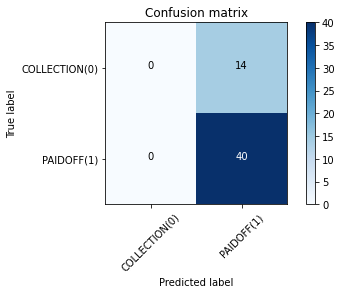

In [49]:
#Confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(yTestSvm, y_hatSvm, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(yTestSvm, yTestSvm))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['COLLECTION(0)','PAIDOFF(1)'],normalize= False,  title='Confusion matrix')

In [50]:
f1_scoreSvm=f1_score(yTestSvm, y_hatSvm)
jaccard_scoreSvm=jaccard_score(yTestSvm, y_hatSvm)

print(f1_scoreSvm)
print(jaccard_scoreSvm)

0.851063829787234
0.7407407407407407


# LOGISTIC REGRESSION MODEL EVALUATION

In [52]:
x_testLr=np.asarray(Label)
x_testLr = preprocessing.StandardScaler().fit(x_testLr).transform(x_testLr)

yTestLr=test_df['loan_status']
yTestLr.replace(to_replace=['PAIDOFF','COLLECTION'],value=[1,0],inplace=True)

y_hatLr=LR.predict(x_testLr)
y_hatLr

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

[[ 0 14]
 [ 0 40]]
Confusion matrix, without normalization
[[ 0 14]
 [ 0 40]]


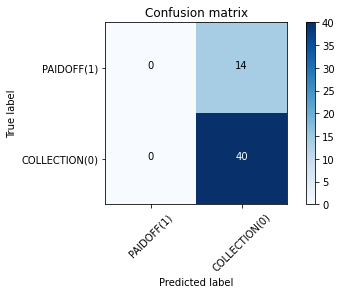

In [53]:
#Confusion matrix for Logistic Regression

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(yTestLr, y_hatLr, labels=[0,1]))

# Compute confusion matrix
cnf_matrix = confusion_matrix(yTestLr, y_hatLr, labels=[0,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF(1)','COLLECTION(0)'],normalize= False,  title='Confusion matrix')

In [54]:
f1_scoreLr=f1_score(yTestLr, y_hatLr)
jaccard_scoreLr=jaccard_score(yTestLr, y_hatLr)
log_lossLr=log_loss(yTestLr,y_hatLr)

print(f1_scoreLr)
print(jaccard_scoreLr)
print(log_lossLr)

0.851063829787234
0.7407407407407407
8.95470488690319


# FINAL ACCURACY REPORTS

In [56]:
dictReport={
    "Algorithm":["KNN","Decision Tree","SVM","Logistic Regression"],
    "Jaccard":[jaccard_scoreKnn,jaccard_scoreDt,jaccard_scoreSvm,jaccard_scoreLr],
    "F1-Score":[f1_scoreKnn,f1_scoreDt,f1_scoreSvm,f1_scoreLr],
    "Log Loss":[None,None,None,log_lossLr]
}

report=pd.DataFrame(dictReport)
report

,Algorithm,Jaccard,F1-Score,Log Loss
0,KNN,0.647059,0.785714,NaN
1,Decision Tree,0.686275,0.813953,NaN
2,SVM,0.740741,0.851064,NaN
3,Logistic Regression,0.740741,0.851064,8.954705
